# Unsupervised Learning –Clustering
    1) K-means,K-means++
    2) Hierarchical Method


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
def plot_scatter(X,  color='k', alpha=0.6):
    #if use color index , the index must be between 0 and 1    
    return plt.scatter(X[:, 0],
                       X[:, 1],
                       c=color,
                       alpha=alpha,
                       edgecolor='k')    


## Genearte sample data and visualiztion

In [27]:
n1=5
n2=5
# cluster 
x1 = np.random.normal(60,10, n1)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5,n1)
C1 = np.array(list(zip(x1,y1)))
# cluster 
x2 = np.random.normal(20,10,n2)
y2 = np.random.normal(5,0.5,n2)
C2 = np.array(list(zip(x2,y2)))

X_train = np.concatenate((C1,C2))

print(np.mean(C1,axis=0))
print(np.mean(C2,axis=0))

[62.80637035  4.90155566]
[16.01235862  5.33902984]


In [29]:
X_train 

array([[60.49705301,  5.87439509],
       [66.44629044,  4.14167284],
       [62.69835328,  4.88071032],
       [63.49046004,  5.21696568],
       [60.89969499,  4.39403437],
       [13.05787598,  5.4900755 ],
       [15.76167866,  4.82417934],
       [30.26633888,  5.59898355],
       [ 5.04698491,  5.22814877],
       [15.92891469,  5.55376206]])

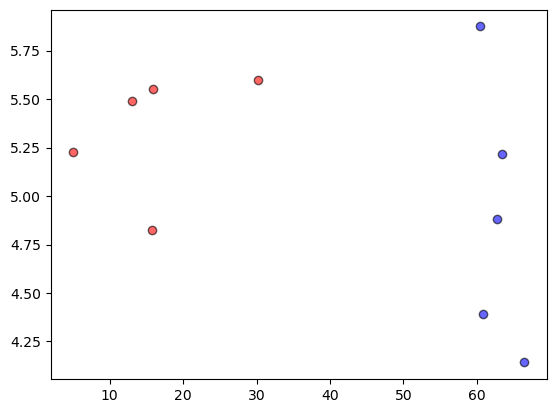

In [30]:
plot_scatter(C1,color='b')
plot_scatter(C2,color='r')
plt.show()

In [31]:
X_train

array([[60.49705301,  5.87439509],
       [66.44629044,  4.14167284],
       [62.69835328,  4.88071032],
       [63.49046004,  5.21696568],
       [60.89969499,  4.39403437],
       [13.05787598,  5.4900755 ],
       [15.76167866,  4.82417934],
       [30.26633888,  5.59898355],
       [ 5.04698491,  5.22814877],
       [15.92891469,  5.55376206]])

In [32]:
X_train.shape

(10, 2)

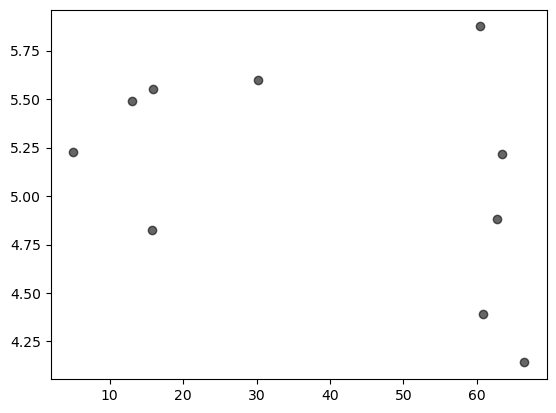

In [33]:
plot_scatter(X_train)
plt.show()

In [34]:
print('mean:',np.mean(X_train,axis=0))
print('std:',np.std(X_train,axis=0))

mean: [39.40936449  5.12029275]
std: [24.14354987  0.52665546]


# K-means algorithm
![](images/kmeans.png)
```    
    init : {‘k-means++’, ‘random’ or an ndarray} Method for initialization, defaults to ‘k-means++’:
    ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
    ‘random’: choose k observations (rows) at random from data for the initial centroids.
    If an ndarray is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.
```    


In [35]:
kmeans = KMeans(init='random',n_clusters=2).fit(X_train)
kmeans

C:\Users\cly\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=2)

In [36]:
kmeans.predict([[80, 0], [100, 3]])

array([1, 1])

In [37]:
kmeans.predict([[28, 5]])

array([0])

In [38]:
kmeans.predict(X_train)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [39]:
kmeans.cluster_centers_

array([[16.01235862,  5.33902984],
       [62.80637035,  4.90155566]])

In [40]:
X_train

array([[60.49705301,  5.87439509],
       [66.44629044,  4.14167284],
       [62.69835328,  4.88071032],
       [63.49046004,  5.21696568],
       [60.89969499,  4.39403437],
       [13.05787598,  5.4900755 ],
       [15.76167866,  4.82417934],
       [30.26633888,  5.59898355],
       [ 5.04698491,  5.22814877],
       [15.92891469,  5.55376206]])

In [41]:
kmeans.labels_  #the same as predict

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

##    Plot Scatter
    1. 將資料點繪製成scatter圖. 請依據K-means分群後的結果來給予不同cluster有不同的顏色
       (cluster數非固定值)
    2. 將K-means中心點資料點也繪製上去並有較大圖樣

In [42]:
kmeans.predict(X_train)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

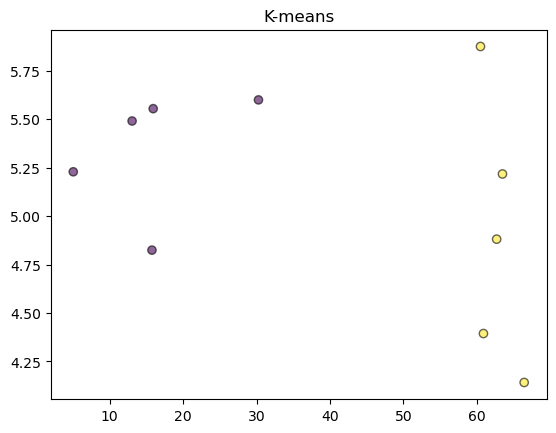

In [43]:
plot_scatter(X_train,kmeans.predict(X_train))
plt.title("K-means")
plt.show()

In [44]:
kmeans.cluster_centers_

array([[16.01235862,  5.33902984],
       [62.80637035,  4.90155566]])

In [45]:
kmeans.cluster_centers_[:,1]

array([5.33902984, 4.90155566])

In [46]:
kmeans.predict(X_train)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

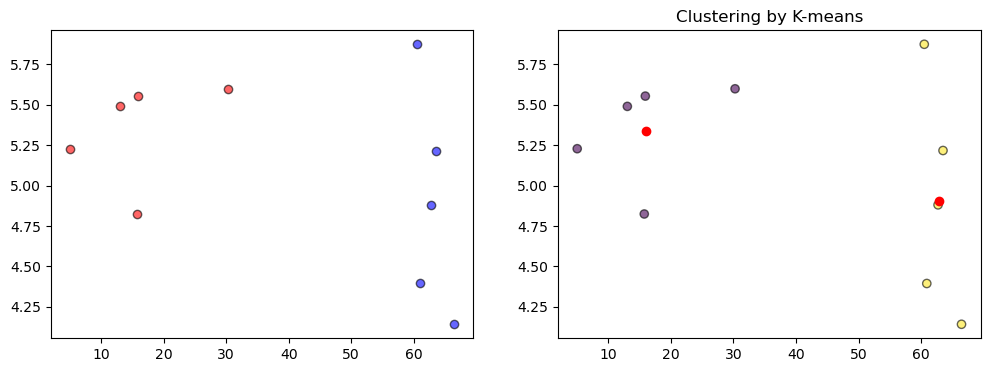

In [47]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_scatter(C1,color='b')
plot_scatter(C2,color='r')
plt.subplot(122)
plot_scatter(X_train,color=kmeans.predict(X_train))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red')  # Center
plt.title("Clustering by K-means")
plt.show()


## Agglomerative algorithm
    1) linkage : {“ward”, “complete”, “average”, “single”}, optional (default=”ward”)
    
    2.) affinity : string or callable, default: “euclidean”
    Metric used to compute the linkage. Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”. If linkage is “ward”, only “euclidean” is accepted. If “precomputed”, a distance matrix (instead of a similarity matrix) is needed as input for the fit method.

In [48]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [49]:
acv = AgglomerativeClustering(n_clusters=2,linkage='single').fit(X_train)
acv

AgglomerativeClustering(linkage='single')

In [50]:
cluster_labels=acv.fit_predict(X_train)
cluster_labels

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

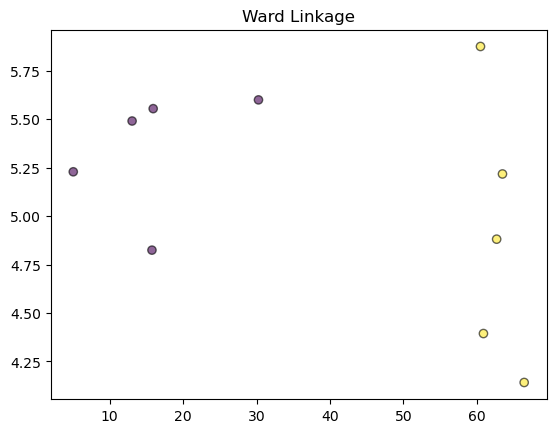

In [51]:
plot_scatter(X_train, acv.fit_predict(X_train))
plt.title("Ward Linkage")
plt.show()

In [52]:
X_train

array([[60.49705301,  5.87439509],
       [66.44629044,  4.14167284],
       [62.69835328,  4.88071032],
       [63.49046004,  5.21696568],
       [60.89969499,  4.39403437],
       [13.05787598,  5.4900755 ],
       [15.76167866,  4.82417934],
       [30.26633888,  5.59898355],
       [ 5.04698491,  5.22814877],
       [15.92891469,  5.55376206]])

## distance matrix

In [54]:
from sklearn.metrics import pairwise_distances
from sklearn.datasets import make_circles,make_blobs
D = np.round(pairwise_distances(X_train),1) 
D

array([[ 0. ,  6.2,  2.4,  3.1,  1.5, 47.4, 44.7, 30.2, 55.5, 44.6],
       [ 6.2,  0. ,  3.8,  3.1,  5.6, 53.4, 50.7, 36.2, 61.4, 50.5],
       [ 2.4,  3.8,  0. ,  0.9,  1.9, 49.6, 46.9, 32.4, 57.7, 46.8],
       [ 3.1,  3.1,  0.9,  0. ,  2.7, 50.4, 47.7, 33.2, 58.4, 47.6],
       [ 1.5,  5.6,  1.9,  2.7,  0. , 47.9, 45.1, 30.7, 55.9, 45. ],
       [47.4, 53.4, 49.6, 50.4, 47.9,  0. ,  2.8, 17.2,  8. ,  2.9],
       [44.7, 50.7, 46.9, 47.7, 45.1,  2.8,  0. , 14.5, 10.7,  0.7],
       [30.2, 36.2, 32.4, 33.2, 30.7, 17.2, 14.5,  0. , 25.2, 14.3],
       [55.5, 61.4, 57.7, 58.4, 55.9,  8. , 10.7, 25.2,  0. , 10.9],
       [44.6, 50.5, 46.8, 47.6, 45. ,  2.9,  0.7, 14.3, 10.9,  0. ]])

In [55]:
D.shape[0]

10

In [56]:
def min_dist(D):
    minimum=10000  
    min_x=0
    min_y=0
    for i in range(D.shape[0]):
        for j in range(i):           
            if D[i][j]<minimum:         
                minimum=D[i][j]
                min_x=i
                min_y=j
                #print(i,j,D[i][j])
                
    return (min_x,min_y),minimum

In [57]:
min_dist(D)

((9, 6), 0.7)

## plot dendrogram (樹狀圖)

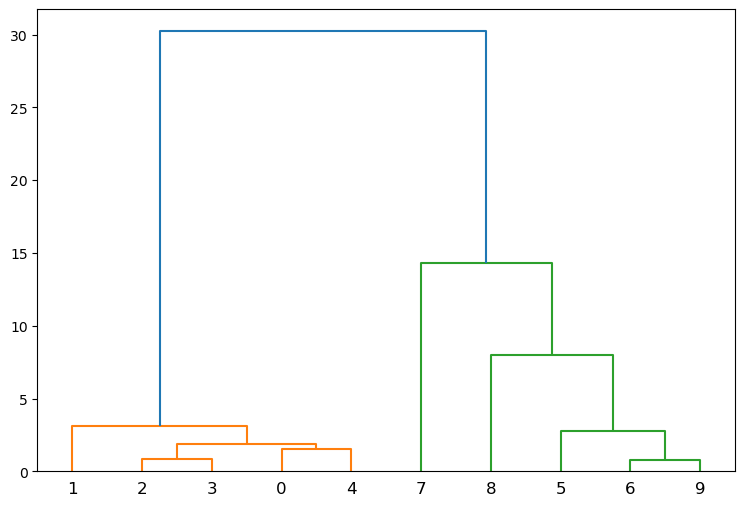

In [58]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 6))

def plot_dendrogram(x, method='ward'):
    Z = linkage(x, method)
    dendrogram(Z)

plot_dendrogram(X_train,'single')
plt.show()

## Comparing different hierarchical linkage methods

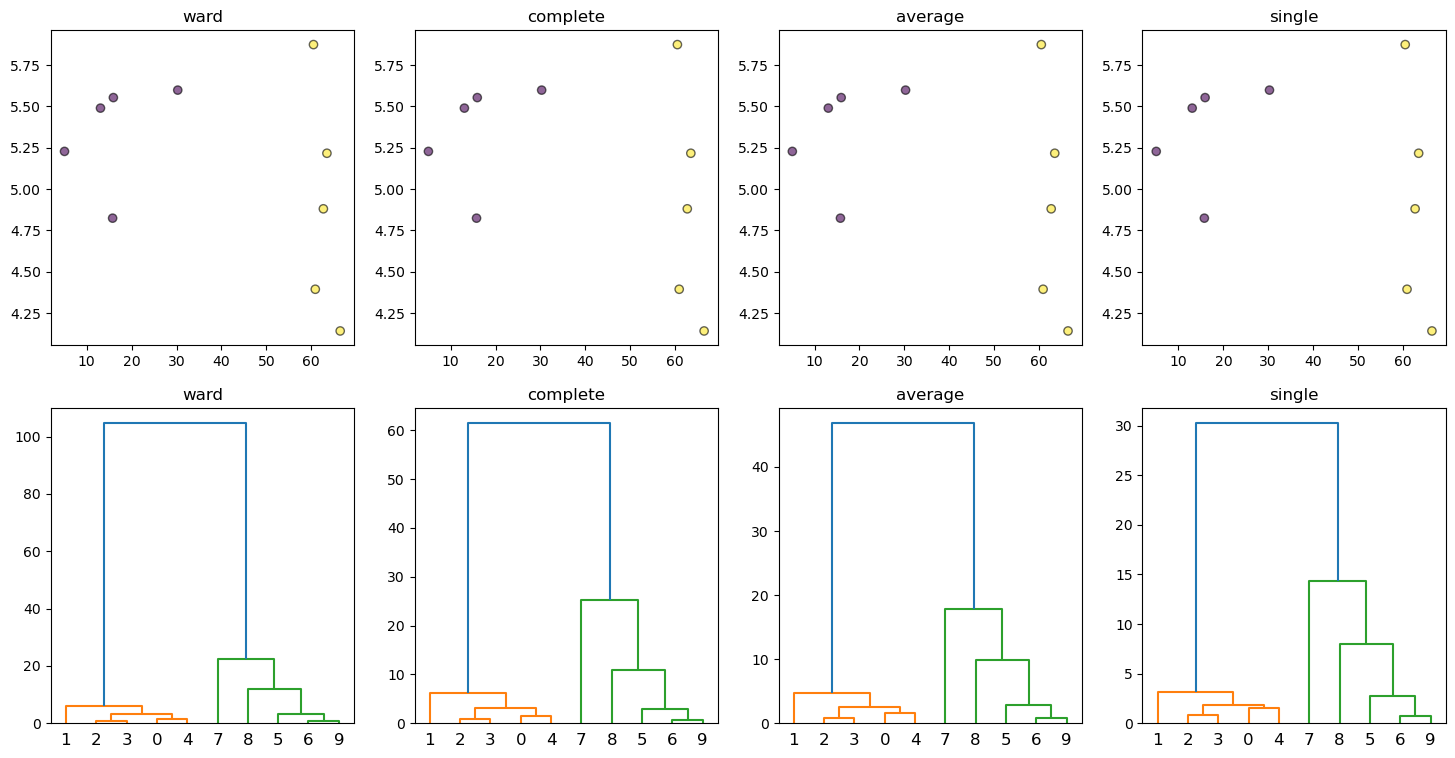

In [60]:

def compare_linkage(X):
    
    plt.figure(figsize=(18, 9))
    linktype=['ward', 'complete', 'average', 'single']

    for i,link in enumerate(linktype):
        model = AgglomerativeClustering(n_clusters=2,linkage=link).fit(X)
        cluster_labels=model.fit_predict(X)   
        #plot scatter 
        plt.subplot(2,4,i+1)        
        plot_scatter(X, cluster_labels)
        plt.title(link)
        # plot dendrogram
        plt.subplot(2,4,i+5)        
        plot_dendrogram(X,link)
        plt.title(link)   

    plt.show()     
    
compare_linkage(X_train)

## Apply K-means with re-scaled data
### Feature Re-scale 

In [61]:
X_train

array([[60.49705301,  5.87439509],
       [66.44629044,  4.14167284],
       [62.69835328,  4.88071032],
       [63.49046004,  5.21696568],
       [60.89969499,  4.39403437],
       [13.05787598,  5.4900755 ],
       [15.76167866,  4.82417934],
       [30.26633888,  5.59898355],
       [ 5.04698491,  5.22814877],
       [15.92891469,  5.55376206]])

[39.40936449  5.12029275]
[24.14354987  0.52665546]


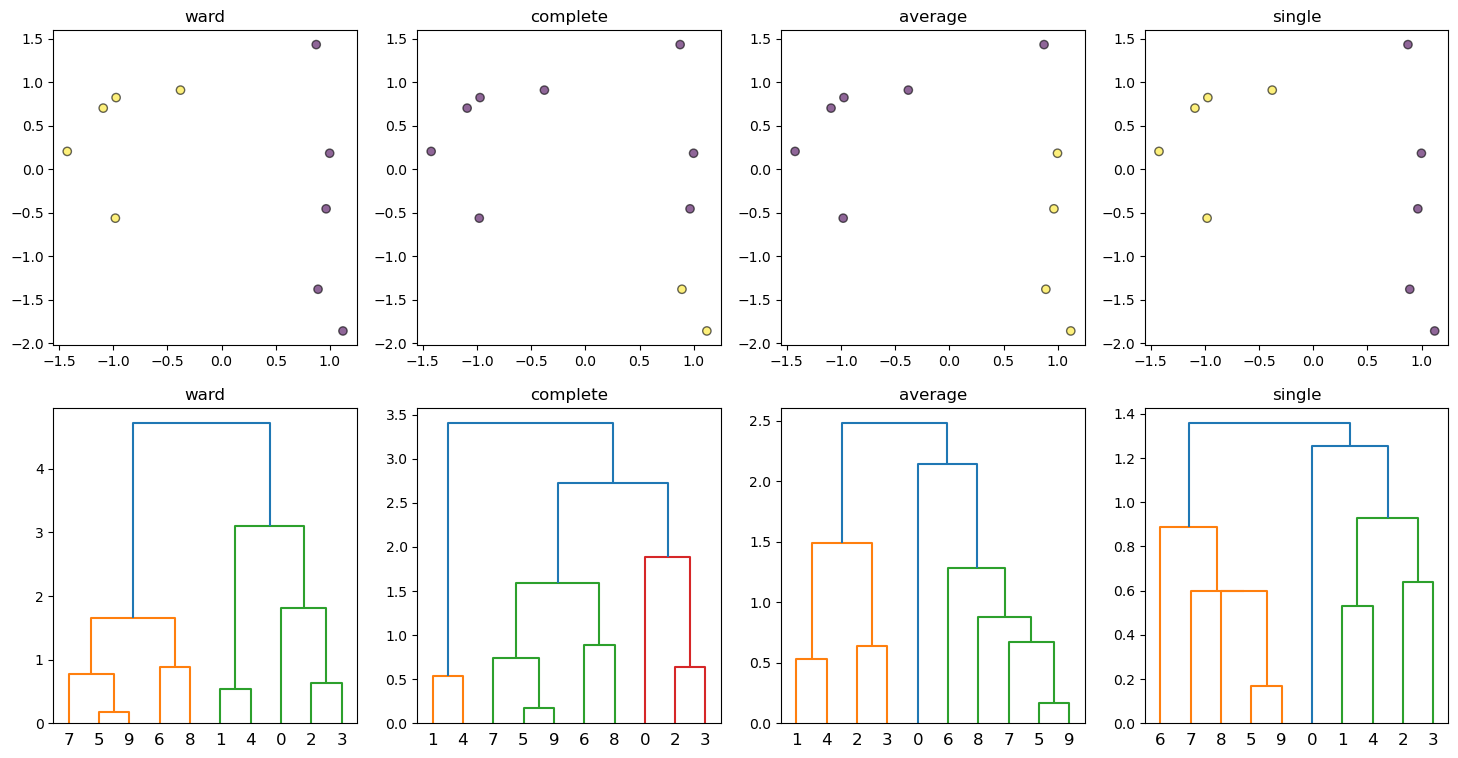

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)  #Compute the statistics to be used for later scaling.
print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

#transform: (x-u)/std.
X_train_std = sc.transform(X_train)

np.round(np.mean(X_train_std,axis=0),2)

compare_linkage(X_train_std)

In [64]:
from sklearn.datasets import make_circles
# make a synthetic dataset (circle) #array of shape [n_samples, 2]
X, y = make_circles(n_samples=100, shuffle=True,factor=0.5, random_state=0, noise=0.05) 

In [65]:
print(X[:10])
print(y[:10])

[[-0.97084503 -0.12673179]
 [-0.01989117 -0.45880462]
 [ 0.95036645  0.21475102]
 [ 0.3868271   0.25685525]
 [-0.53375109 -0.00663921]
 [ 0.34970205 -0.2956982 ]
 [-0.41722927  0.81854348]
 [-0.47625865  0.08139568]
 [ 0.42783229  0.26529816]
 [ 0.36259195 -0.27483444]]
[0 1 0 1 1 1 0 1 1 1]


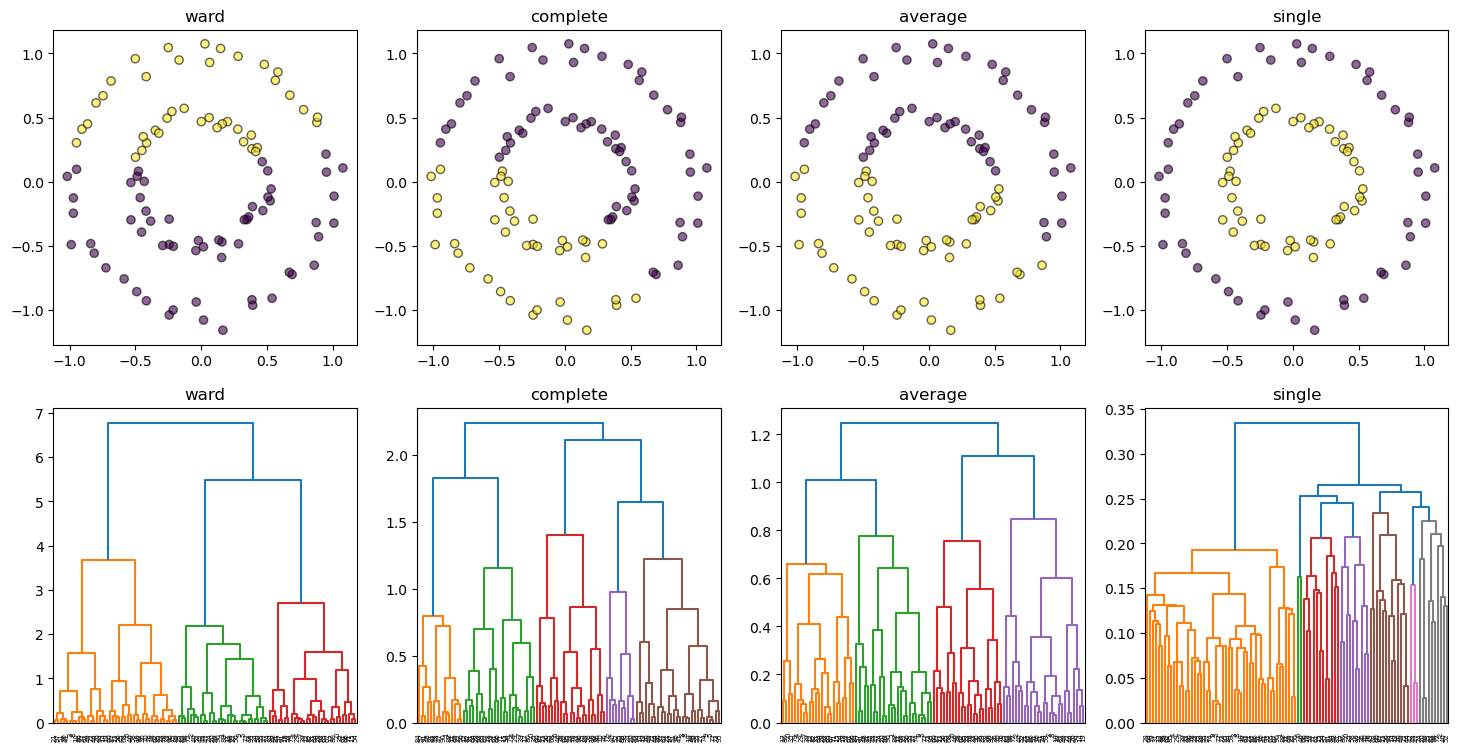

In [66]:
compare_linkage(X)